## Introduction

### **Problem Statement**

> Modelling house prices based on other factors

### **Success Metrics**

    1. Accuracy score of above 80%
    2. Least possible RMSE value
    3. Identifying the best Model

### **Understanding the context**

Hass Consulting Company is a real estate leader with over 25 years of experience. The company wishes to understand the factors that affect the price of a house and to further build a model to predict the price of a house given a set of the predictor variables.

### **Recording the Experimental Design**

* Read and explore the given dataset.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis. This will be done using the following regression techniques:

    1. Linear Regression
    2. Quantile Regression
    3. Ridge Regression
    4. Lasso Regression
    5. Elastic Net Regression
* Check for multicollinearity
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Provide a recommendation based on your analysis.
* Challenge the solution by providing insights on how you can make improvements in model improvement.

### **Data Relevance**

The data contains much of the factors that are considered when purchasing a house. Worth noting is that each of these features comes at a cost. For example extra room implies extra cost and so on.

## Loading Libraries and Data

In [2]:
# Importing the Necessary Libraries
import pandas as pd


import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

In [3]:
# Loading the Dataset
df = pd.read_csv('house_data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Previewing the tail of the data
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
# Data Size
print('Rows: ', df.shape[0])
print('Columns: ', df.shape[1])

Rows:  21613
Columns:  20


In [6]:
# Confirming the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

* The **id** column is not useful in this analysis
* There are no missing values in this data
* **price** column has our depedent variable that we wish to determine factors that affect it and to further create a model that predicts it based on the remaining fetures
* In so much as the following columns are numeric **bedroom, bathrooms, floors, waterfront, year_built** and  **zip_code** represent nominal values

In [7]:
# Identifying variables with integer datatype
df.dtypes[df.dtypes == 'int64']

id               int64
bedrooms         int64
sqft_living      int64
sqft_lot         int64
waterfront       int64
view             int64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
zipcode          int64
sqft_living15    int64
sqft_lot15       int64
dtype: object

In [8]:
# Dropping the 'id' column
df = df.drop(['id'], axis=1)

In [9]:
# Previewing the Data
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16653,245000.0,4,2.50,1700,4268,2.0,0,0,3,7,1700,0,2000,0,98001,47.3303,-122.268,1700,4488
16187,1310000.0,4,2.50,2680,12215,1.0,1,4,3,9,1590,1090,1956,0,98166,47.4396,-122.353,2960,19964
513,290000.0,4,1.00,1330,8184,1.5,0,0,3,7,1330,0,1949,0,98133,47.7343,-122.347,1220,660
2544,336800.0,5,1.75,1830,16650,1.5,0,0,3,7,1610,220,1958,0,98155,47.7734,-122.315,1790,12743
18258,260000.0,4,2.75,2240,7200,1.0,0,0,3,7,1140,1100,1967,0,98001,47.3357,-122.275,1580,7416


In [10]:
# Numeric Features Description
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
# Checking for duplicates
df.duplicated().any()

True

In [12]:
# Dropping the Duplicates
df = df.drop_duplicates()
df.duplicated().any()

False

## Exploratory Data Analysis

### Univariate Analysis

In [13]:
# Exploring the TARGET variable
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(16,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


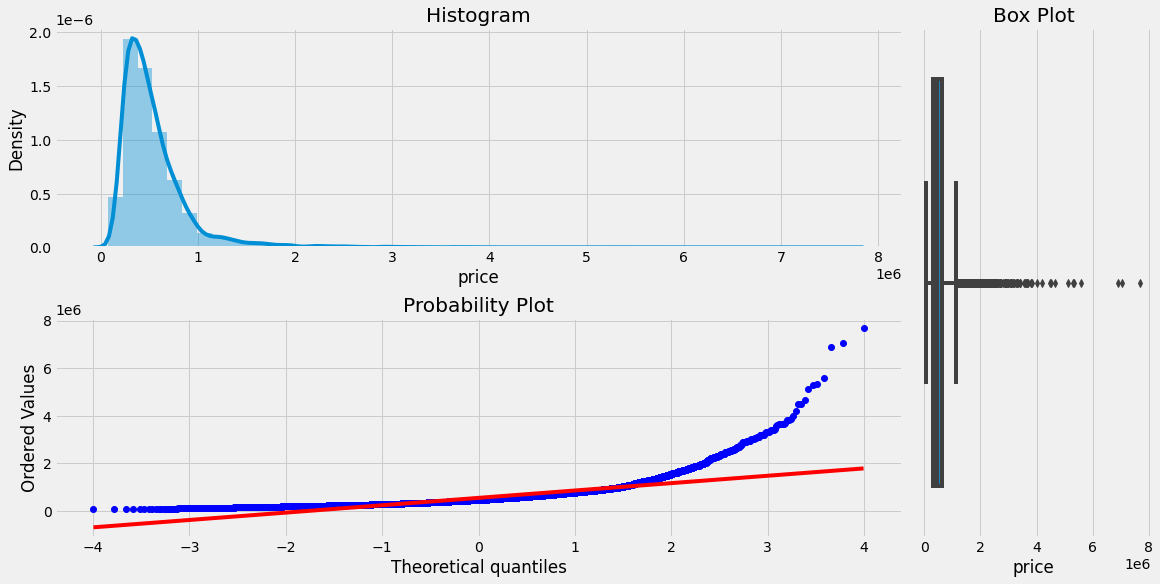

In [14]:
plotting_3_chart(df, 'price')

* Our target variable, SalePrice is **not normally distributed.**
* Our target variable is right-skewed.
* There are multiple outliers in the variable.


In [15]:
# Skewness and Kurtosis
print("Skewness: " + str(df['price'].skew()))
print("Kurtosis: " + str(df['price'].kurt()))

Skewness: 4.021354631513139
Kurtosis: 34.51538421151693


In [16]:
# Getting the correlation of all the features with target variable. 
(df.corr()**2)["price"].sort_values(ascending = False)[1:]

sqft_living      0.492866
grade            0.445649
sqft_above       0.366699
sqft_living15    0.342661
bathrooms        0.275775
view             0.157976
sqft_basement    0.104886
bedrooms         0.095058
lat              0.094198
waterfront       0.070933
floors           0.065990
yr_renovated     0.016002
sqft_lot         0.008037
sqft_lot15       0.006797
yr_built         0.002919
zipcode          0.002824
condition        0.001323
long             0.000464
Name: price, dtype: float64

#### Price vs sqft_living

In [17]:
# Scatter plot function
def customized_scatterplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x)

In [33]:
# Boxplot function
def customized_boxplot(y, x):
  style.use('seaborn-deep')
  plt.subplots(figsize=(12, 8))
  sns.boxplot(y=y, x=x)

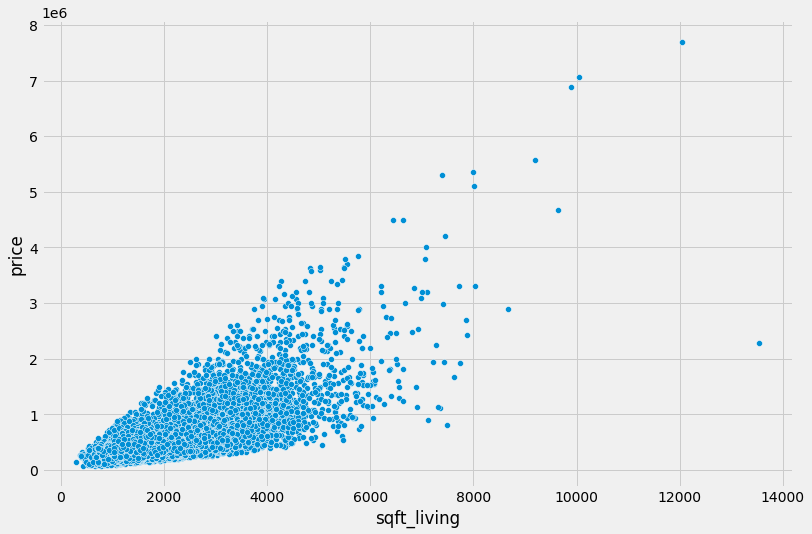

In [18]:
customized_scatterplot(df.price, df.sqft_living)

#### Price vs grade

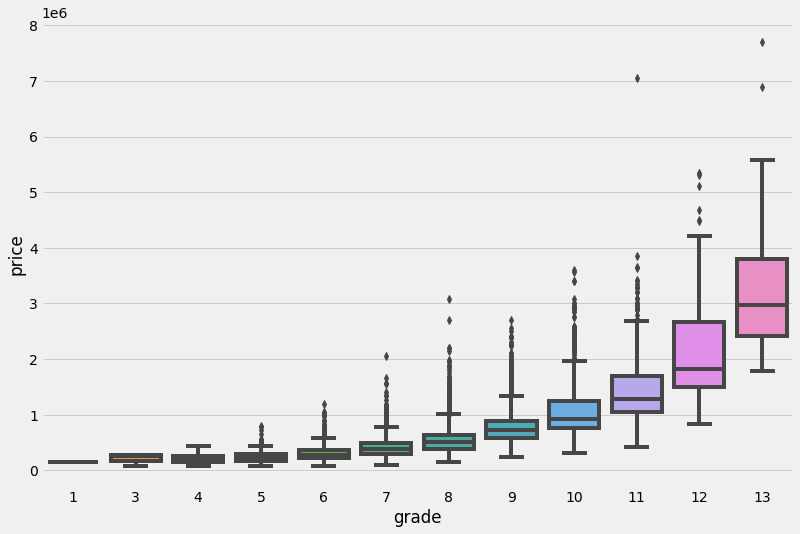

In [34]:
customized_boxplot(df.price, df.grade)

* **Grade** is a categorical variable
* Scatter plot is not the best way to visualize categorical variables. 
* The boxplot result indicates an apparent relationship between the two features. 
* The **average price** of the houses increases with the increase in house **grade**
* Additionally, in each house grade there are outliers of houses with overly high prices

#### Price vs sqft_above

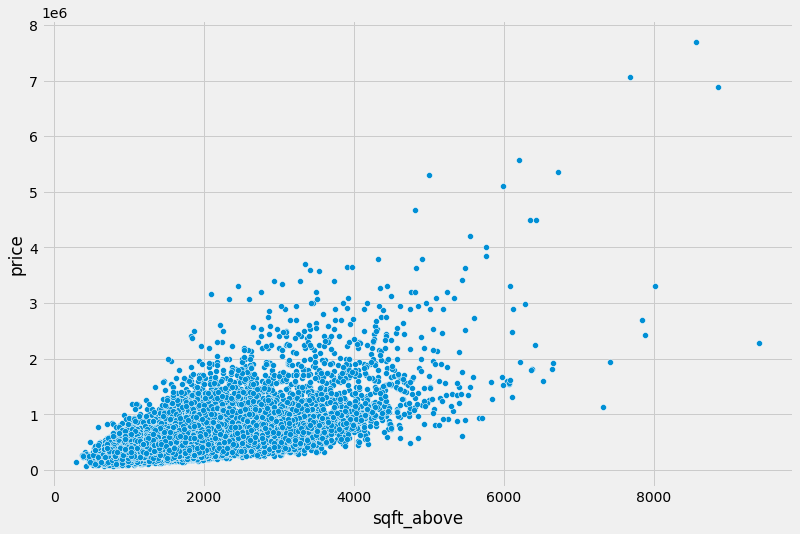

In [20]:
customized_scatterplot(df.price, df.sqft_above)

#### Price vs sqft_living15

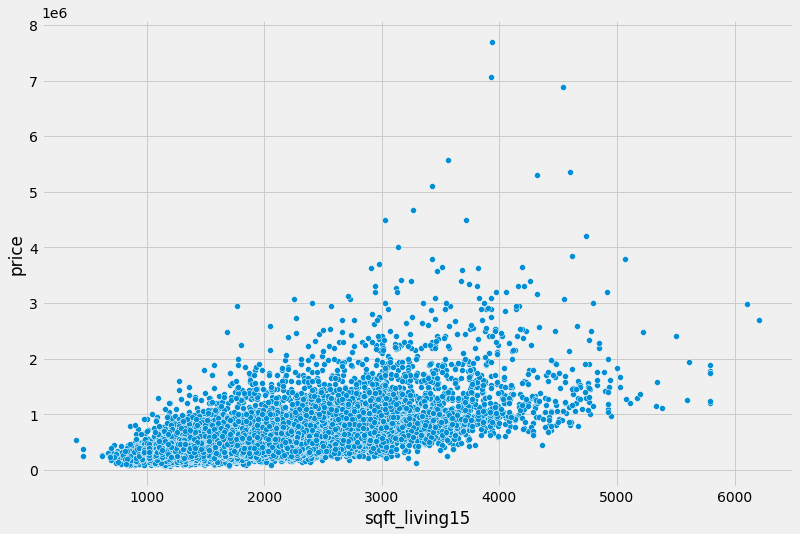

In [21]:
customized_scatterplot(df.price, df.sqft_living15)

#### Price vs Bathrooms

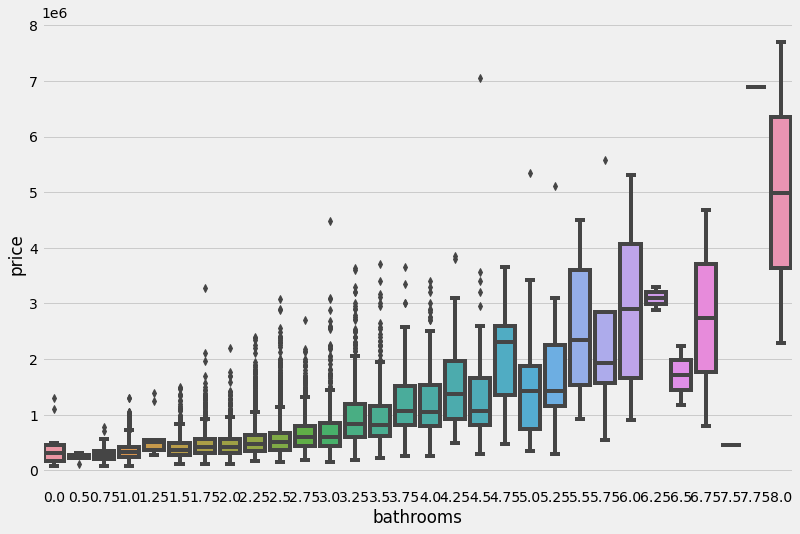

In [35]:
customized_boxplot(df.price, df.bathrooms)

* There is a general increase in the **average price** of a house with increase in the **number of bathrooms**
* Outliers are also observed in each of the categories

#### Price vs View

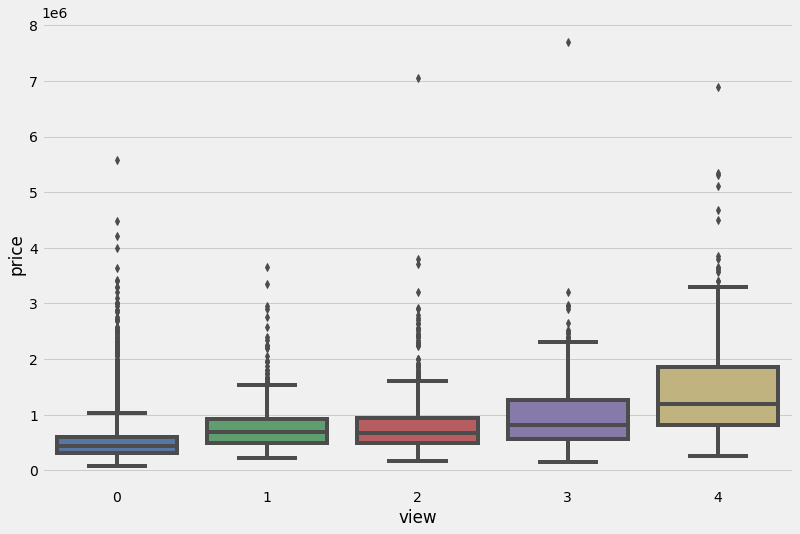

In [36]:
customized_boxplot(df.price, df.view)

* The average price of a house is changes with change in view offered by the house

#### Price vs sqft_basement

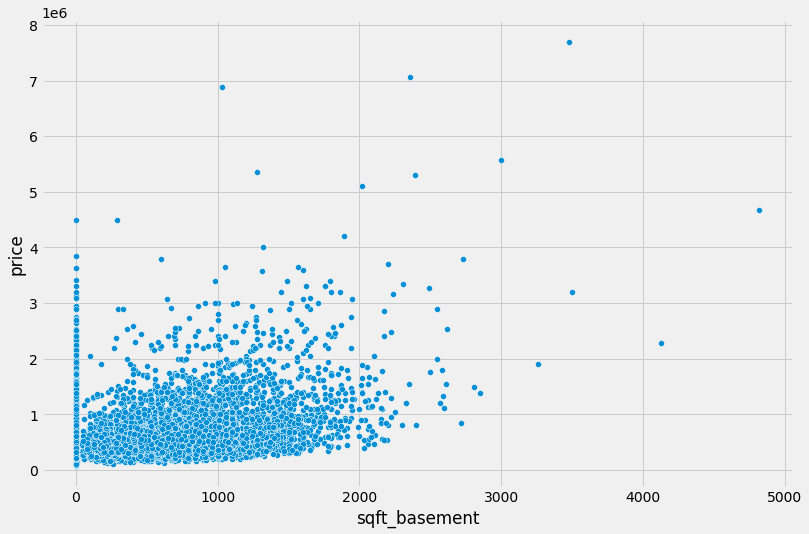

In [37]:
customized_scatterplot(df.price, df.sqft_basement)

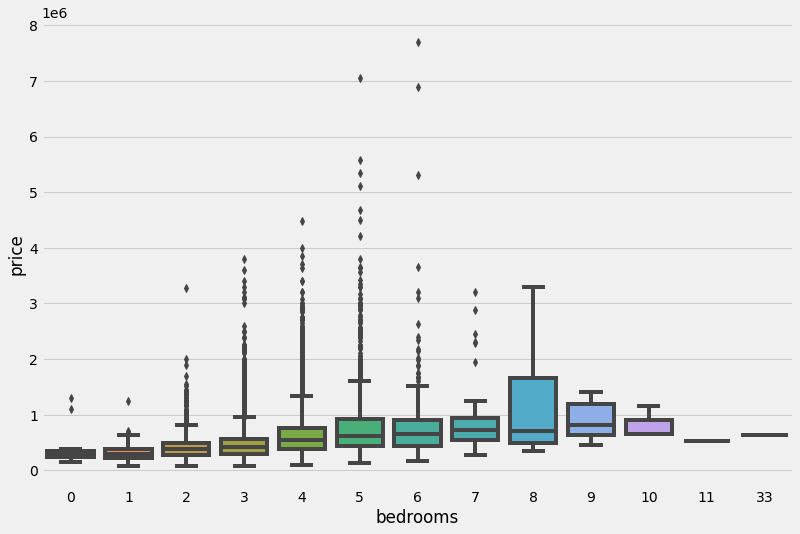

In [38]:
customized_boxplot(df.price, df.bedrooms)

* Generally it is observed that the **average price** of a house increases with increase in the **number of bedrooms**
* Outliers are also noted where the price are exceptionally high as compared to houses with the same number of bedroom

#### Price vs lat

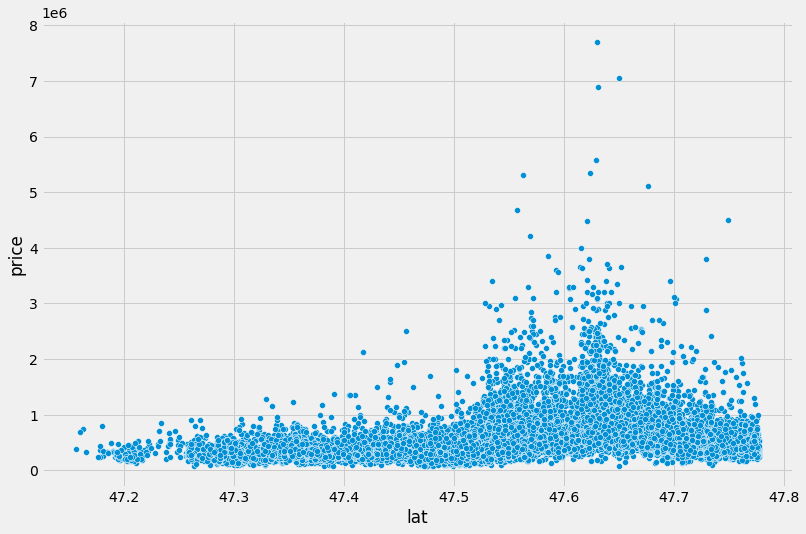

In [39]:
customized_scatterplot(df.price, df.lat)

* There is no linear relationship between the price of a house and its latitude
* However, it is observed that there is a latitude regions when houses are generally highly priced. This could be contributed to by a number of other factors such as presence of controlled development and so on

#### Price vs Waterfront

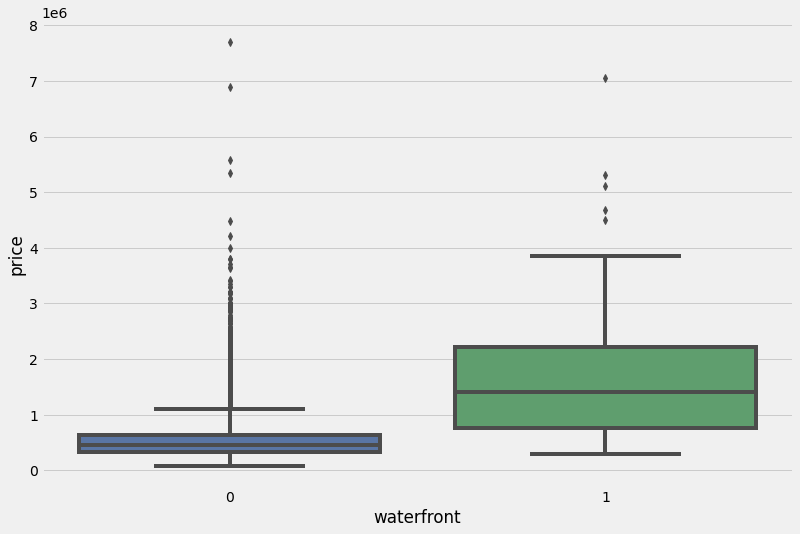

In [40]:
customized_boxplot(df.price, df.waterfront)

Note:

    0 - No Waterfront
    1 - Waterfront Present

* Houses at the Waterfront generally are highly priced.

#### Price vs Floors

In [23]:
waterfront       0.070933
floors           0.065990
yr_renovated     0.016002
sqft_lot         0.008037
sqft_lot15       0.006797
yr_built         0.002919
zipcode          0.002824
condition        0.001323
long             0.000464

SyntaxError: ignored

When dealing with numerical variables, we have to check their properties like:
   1. Mean
   2. Median
   3. Standard Deviation
   4. Kurtosis/skewness
   5. Distribution/range


In [ ]:
df.columns

#### Price

In [ ]:
price_fig, axs = plt.subplots(ncols = 4, figsize=(16, 4))

sns.distplot(df.price, kde=False, ax=axs[0])
second_plt = sns.distplot(df.price, kde=False, ax=axs[1])
sns.boxplot(df.price, ax=axs[2], orient = 'v')
# sns.boxplot(df.price, ax=axs[3], orient = 'v', showfliers=False)

# second_plt.set_yscale('log')

In [ ]:
sns.distplot(df.price, kde=False, ax=axs[0])

### Bivariate Analysis

### Multivariate Analysis

## Models

### Linear Regression

### Quantile Regression

### Ridge Regression

### Lasso Regression

### Elastic Net Regression